# Sales Data Analysis (2013-2016)
This notebook provides an analysis of the sales data from 2013 to 2016.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sales data
sales_data = pd.read_csv('sales_data.csv')

# Parse 'Date' column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Drop rows with invalid dates, if any
sales_data = sales_data.dropna(subset=['Date'])

# Calculate monthly sales totals
monthly_sales = (
    sales_data.groupby(sales_data['Date'].dt.to_period('M'))['Revenue']
    .sum()
    .reset_index()
)
monthly_sales.columns = ['Month', 'Total_Sales']

monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales['Total_Sales'] = pd.to_numeric(monthly_sales['Total_Sales'], errors='coerce')

# Identify the top 3 products by total sales
top_products = (
    sales_data.groupby('Product')['Revenue']
    .sum()
    .nlargest(3)
    .reset_index()
)
top_products.columns = ['Product', 'Total_Sales']

# Display head of results for confirmation
print(monthly_sales.head(), top_products)

     Month  Total_Sales
0  2011-01       675193
1  2011-02       637598
2  2011-03       708517
3  2011-04       698782
4  2011-05       734537                   Product  Total_Sales
0        Road-150 Red, 62      3829416
1  Mountain-200 Black, 38      3366248
2        Road-150 Red, 52      3180840


Monthly Sales Total Plot

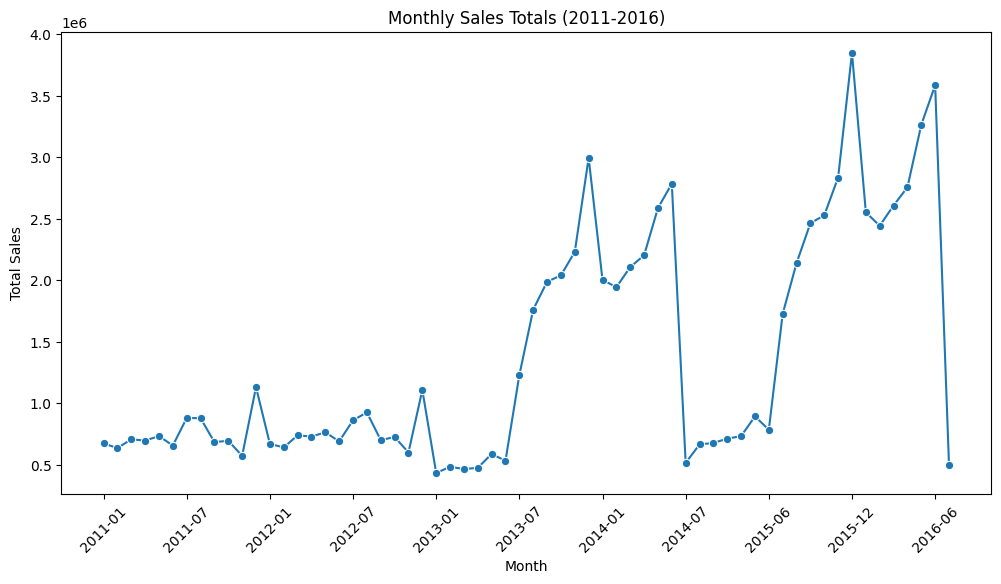

In [9]:
# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o')

# x-ticks to show only every 6th month for better readability
plt.xticks(ticks=monthly_sales.index[::6], labels=monthly_sales['Month'][::6], rotation=45)

plt.title('Monthly Sales Totals (2011-2016)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


Top 3 Products by Total Sales Plot


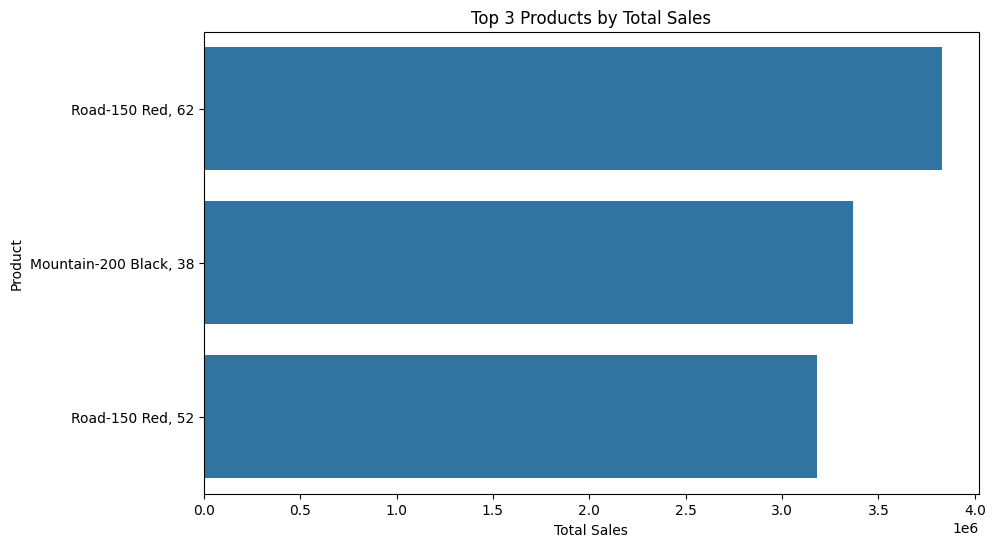

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Total_Sales', y='Product')
plt.title('Top 3 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()


# Monthly Sales Total and Top 3 Products

In [11]:
with open('sales_report.csv', 'w') as f:
    f.write("Monthly Sales Totals\n")
    monthly_sales.to_csv(f, index=False)
    f.write("\nTop 3 Products by Total Sales\n")
    top_products.to_csv(f, index=False)

print("CSV file 'sales_report.csv' has been created.")


CSV file 'sales_report.csv' has been created.
